In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
#Analyzing the distribution of ratings
def analyze_ratings_distribution(ratings):
    fig, axes = plt.subplots(2, 2, figsize=(15,10))
    #Rating Distribution
    axes[0,0].hist(ratings['rating'], bins=5, alpha=0.7, edgecolor='black')
    axes[0,0].set_title('Distribution of Ratings')
    axes[0,0].set_xlabel('Rating')
    axes[0,0].set_ylabel('Count')
    #Ratings per user distribution
    user_rating_counts = ratings.groupby('user_id').size()
    axes[0,1].hist(user_rating_counts, bins=50, alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Ratings per User Distribution')
    axes[0,1].set_xlabel('Number of Ratings')
    axes[0,1].set_ylabel('Number of Users')
    #Ratings per movie distribution
    movie_rating_counts = ratings.groupby('movie_id').size()
    axes[1,0].hist(movie_rating_counts, bins=50, alpha=0.7, edgecolor='black')
    axes[1,0].set_title('Ratings per Movie Distribution')
    axes[1,0].set_xlabel('Number of Ratings')
    axes[1,0].set_ylabel('Number of Movies')
    # Rating statistics by rating value
    rating_stats = ratings.groupby('rating').size()
    axes[1,1].bar(rating_stats.index, rating_stats.values, alpha=0.7)
    axes[1,1].set_title('Count by Rating Value')
    axes[1,1].set_xlabel('Rating')
    axes[1,1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    # Print key statistics
    print("=== RATING STATISTICS ===")
    print(f"Average rating: {ratings['rating'].mean():.2f}")
    print(f"Rating std: {ratings['rating'].std():.2f}")
    print(f"Average ratings per user: {user_rating_counts.mean():.1f}")
    print(f"Average ratings per movie: {movie_rating_counts.mean():.1f}")
    print(f"Median ratings per user: {user_rating_counts.median():.1f}")
    print(f"Median ratings per movie: {movie_rating_counts.median():.1f}")
    
    return user_rating_counts, movie_rating_counts


In [3]:
#Analyzing the sparsity
def analyze_sparsity(ratings):
    n_users = ratings['user_id'].nunique()
    n_movies = ratings['movie_id'].nunique()
    n_ratings = len(ratings)
    possible_ratings = n_users*n_movies

    sparsity = 1 - (n_ratings/possible_ratings)
    print("=== SPARSITY ANALYSIS ===")
    print(f"Number of users: {n_users:,}")
    print(f"Number of movies: {n_movies:,}")
    print(f"Total possible user-movie pairs: {possible_ratings:,}")
    print(f"Actual ratings: {n_ratings:,}")
    print(f"Sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)")
    print(f"Density: {1-sparsity:.4f} ({(1-sparsity)*100:.2f}%)")
    
    return sparsity

In [4]:
#Analyzing the temporal patterns
def analyze_temporal_patterns(ratings):
    #Convert timestamp to datetime
    ratings['date_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
    ratings['year'] = ratings['date_time'].dt.year
    ratings['month'] = ratings['date_time'].dt.month
    ratings['hour'] = ratings['date_time'].dt.hour
    ratings['day'] = ratings['date_time'].dt.dayofweek

    fig, axes = plt.subplots(2,2, figsize=(15,10))

    #Ratings by year
    yearly_ratings = ratings.groupby('year').size()
    axes[0,0].plot(yearly_ratings.index, yearly_ratings.values, marker='o')
    axes[0,0].set_title('Ratings by Year')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Number of Ratings')
    # Ratings by month
    monthly_ratings = ratings.groupby('month').size()
    axes[0,1].bar(monthly_ratings.index, monthly_ratings.values, alpha=0.7)
    axes[0,1].set_title('Ratings by Month')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Number of Ratings')
    # Ratings by hour
    hourly_ratings = ratings.groupby('hour').size()
    axes[1,0].plot(hourly_ratings.index, hourly_ratings.values, marker='o')
    axes[1,0].set_title('Ratings by Hour of Day')
    axes[1,0].set_xlabel('Hour')
    axes[1,0].set_ylabel('Number of Ratings')
    # Ratings by day of week
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_ratings = ratings.groupby('day').size()
    axes[1,1].bar(range(7), dow_ratings.values, alpha=0.7)
    axes[1,1].set_title('Ratings by Day of Week')
    axes[1,1].set_xlabel('Day of Week')
    axes[1,1].set_ylabel('Number of Ratings')
    axes[1,1].set_xticks(range(7))
    axes[1,1].set_xticklabels(day_names)
    
    plt.tight_layout()
    plt.show()
    
    print("=== TEMPORAL PATTERNS ===")
    print(f"Date range: {ratings['date_time'].min()} to {ratings['date_time'].max()}")
    print(f"Peak rating hour: {hourly_ratings.idxmax()}:00")
    print(f"Peak rating day: {day_names[dow_ratings.idxmax()]}")

In [5]:
def analyze_users(users):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    # Gender distribution
    gender_counts = users['gender'].value_counts()
    axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
    axes[0,0].set_title('Gender Distribution')
    # Age distribution
    age_counts = users['age'].value_counts().sort_index()
    axes[0,1].bar(age_counts.index, age_counts.values, alpha=0.7)
    axes[0,1].set_title('Age Distribution')
    axes[0,1].set_xlabel('Age Group')
    axes[0,1].set_ylabel('Count')
    # Occupation distribution (top 10)
    occ_counts = users['occupation'].value_counts().head(10)
    axes[1,0].barh(range(len(occ_counts)), occ_counts.values, alpha=0.7)
    axes[1,0].set_title('Top 10 Occupations')
    axes[1,0].set_yticks(range(len(occ_counts)))
    axes[1,0].set_yticklabels(occ_counts.index)
    # Age by gender
    age_gender = users.groupby(['age', 'gender']).size().unstack(fill_value=0)
    age_gender.plot(kind='bar', ax=axes[1,1], alpha=0.7)
    axes[1,1].set_title('Age Distribution by Gender')
    axes[1,1].set_xlabel('Age Group')
    axes[1,1].set_ylabel('Count')
    axes[1,1].legend(title='Gender')
    
    plt.tight_layout()
    plt.show()

In [6]:
#Analyzing Movies
def analyze_movies(movies):
    all_genres = []
    for genres in movies['genres']:
        all_genres.extend(genres.split('|'))

    genre_counts = pd.Series(all_genres).value_counts()
    plt.figure(figsize=(12,8))
    plt.subplot(2, 1, 1)
    genre_counts.plot(kind='bar', alpha=0.7)
    plt.title('Movie Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot movies by decade
    # Extract year from title (format: "Title (Year)")
    years = []
    for title in movies['title']:
        try:
            year = int(title[-5:-1])  # Extract year from "(YYYY)"
            years.append(year)
        except:
            years.append(None)
    
    movies['year'] = years
    movies['decade'] = (movies['year'] // 10) * 10
    
    plt.subplot(2, 1, 2)
    decade_counts = movies['decade'].value_counts().sort_index()
    decade_counts.plot(kind='bar', alpha=0.7)
    plt.title('Movies by Decade')
    plt.xlabel('Decade')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    print("=== MOVIE STATISTICS ===")
    print(f"Total movies: {len(movies)}")
    print(f"Unique genres: {len(genre_counts)}")
    print(f"Most common genre: {genre_counts.index[0]} ({genre_counts.iloc[0]} movies)")
    print(f"Average genres per movie: {len(all_genres) / len(movies):.1f}")


In [7]:
#Loading User Data
def load_data():
    ratings = pd.read_csv('../movies_dataset/ratings.dat',
                sep="::", header=None, 
                names=["user_id", "movie_id", "rating", "timestamp"],
                engine='python')

    movies = pd.read_csv('../movies_dataset/movies.dat',
                sep="::", header=None, 
                names=["movie_id", "title", "genres"],
                engine='python',
                encoding='latin-1')

    users = pd.read_csv('../movies_dataset/users.dat',
                sep="::", header=None, 
                names=["user_id", "gender", "age", "occupation", "zip-code"],
                engine='python')
    return ratings, movies, users

In [8]:
ratings, movies, users = load_data()

In [9]:
# Run all analyses
def run_full_eda(ratings, movies, users):
    print("Starting comprehensive EDA...")
    
    # Analyze ratings
    user_counts, movie_counts = analyze_ratings_distribution(ratings)
    
    # Analyze sparsity
    sparsity = analyze_sparsity(ratings)
    
    # Analyze temporal patterns
    analyze_temporal_patterns(ratings)
    
    # Analyze users
    analyze_users(users)
    
    # Analyze movies
    analyze_movies(movies)
    
    print("\nEDA Complete! Key insights:")
    print("1. Check sparsity level - affects model choice")
    print("2. Look at rating distribution - affects loss functions")
    print("3. Note user/movie activity patterns - affects train/test splits")
    print("4. Consider temporal patterns - might need time-based features")

Starting comprehensive EDA...


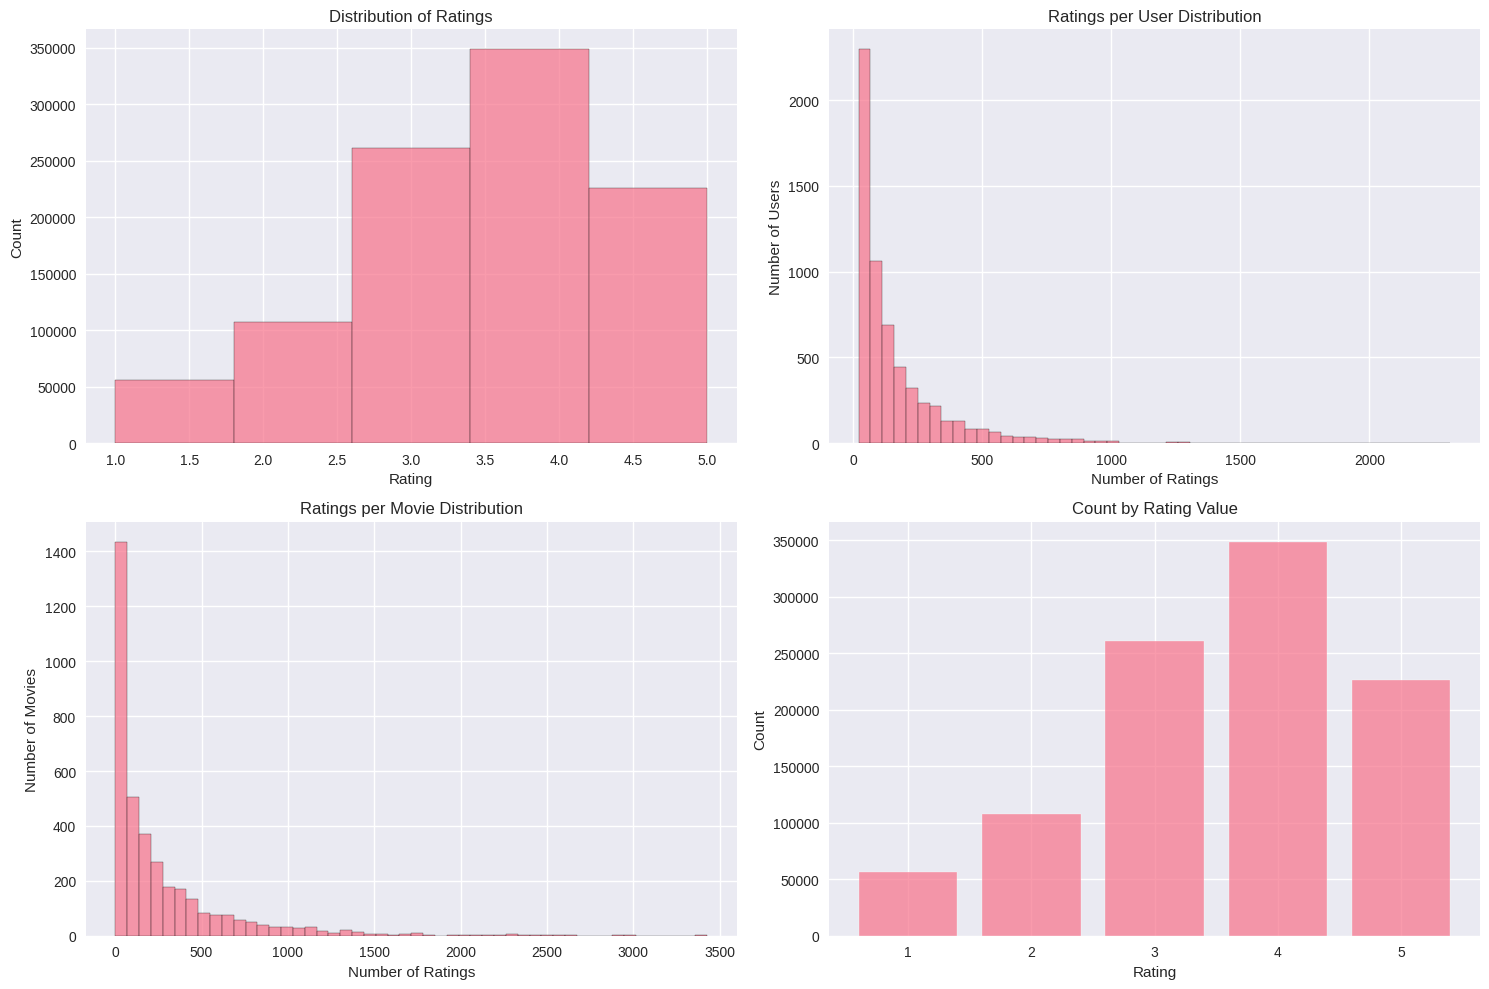

=== RATING STATISTICS ===
Average rating: 3.58
Rating std: 1.12
Average ratings per user: 165.6
Average ratings per movie: 269.9
Median ratings per user: 96.0
Median ratings per movie: 123.5
=== SPARSITY ANALYSIS ===
Number of users: 6,040
Number of movies: 3,706
Total possible user-movie pairs: 22,384,240
Actual ratings: 1,000,209
Sparsity: 0.9553 (95.53%)
Density: 0.0447 (4.47%)


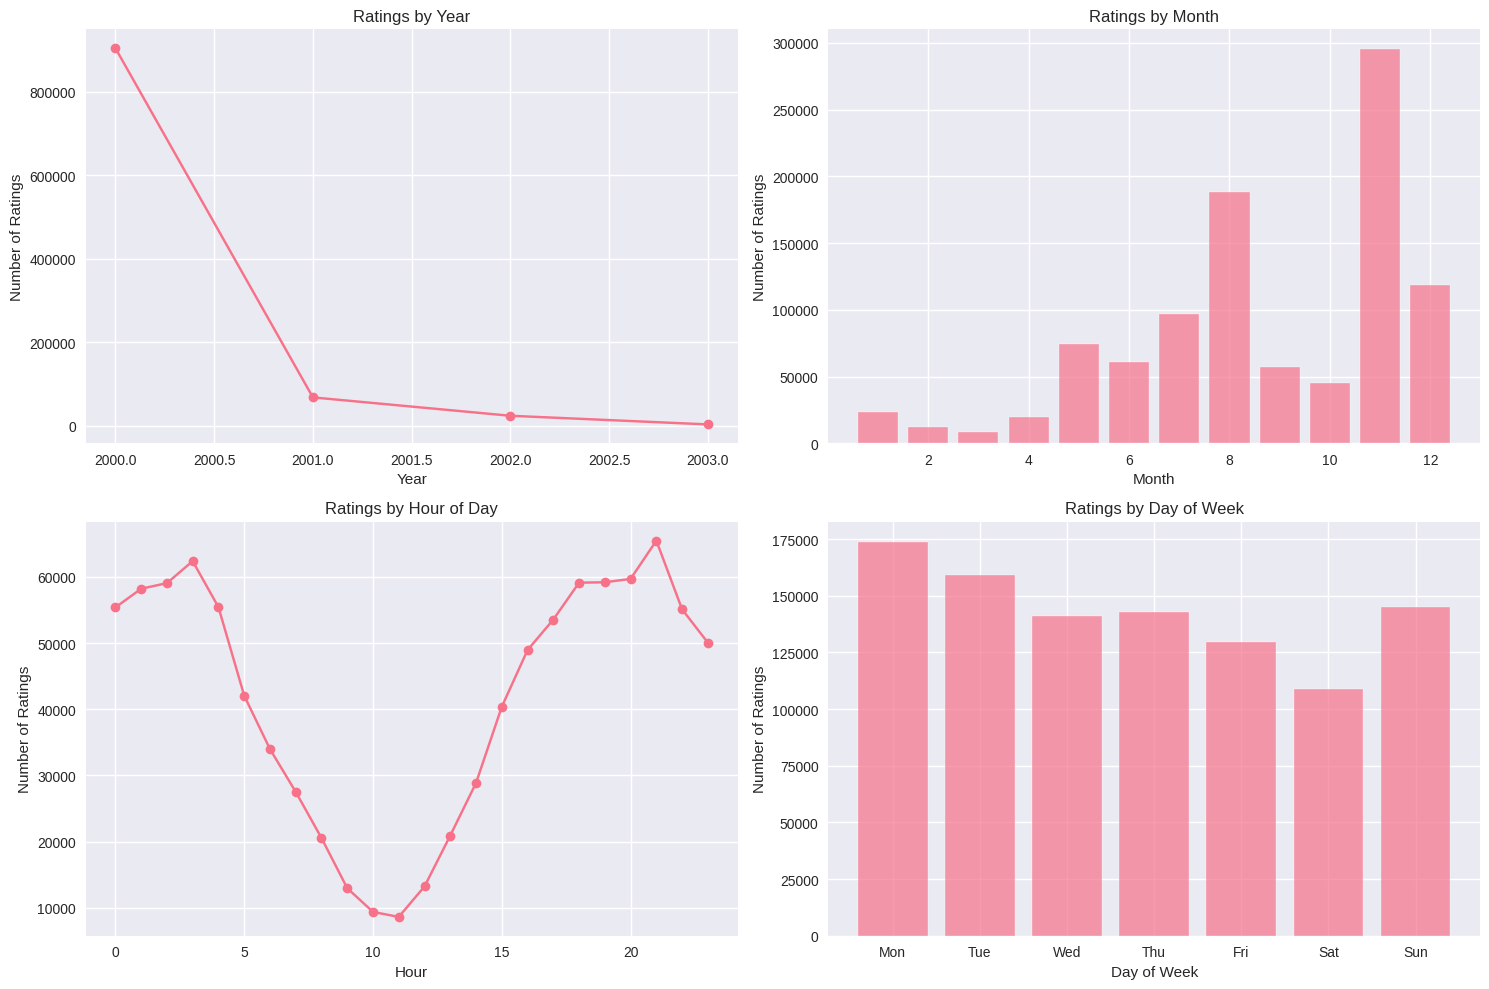

=== TEMPORAL PATTERNS ===
Date range: 2000-04-25 23:05:32 to 2003-02-28 17:49:50
Peak rating hour: 21:00
Peak rating day: Mon


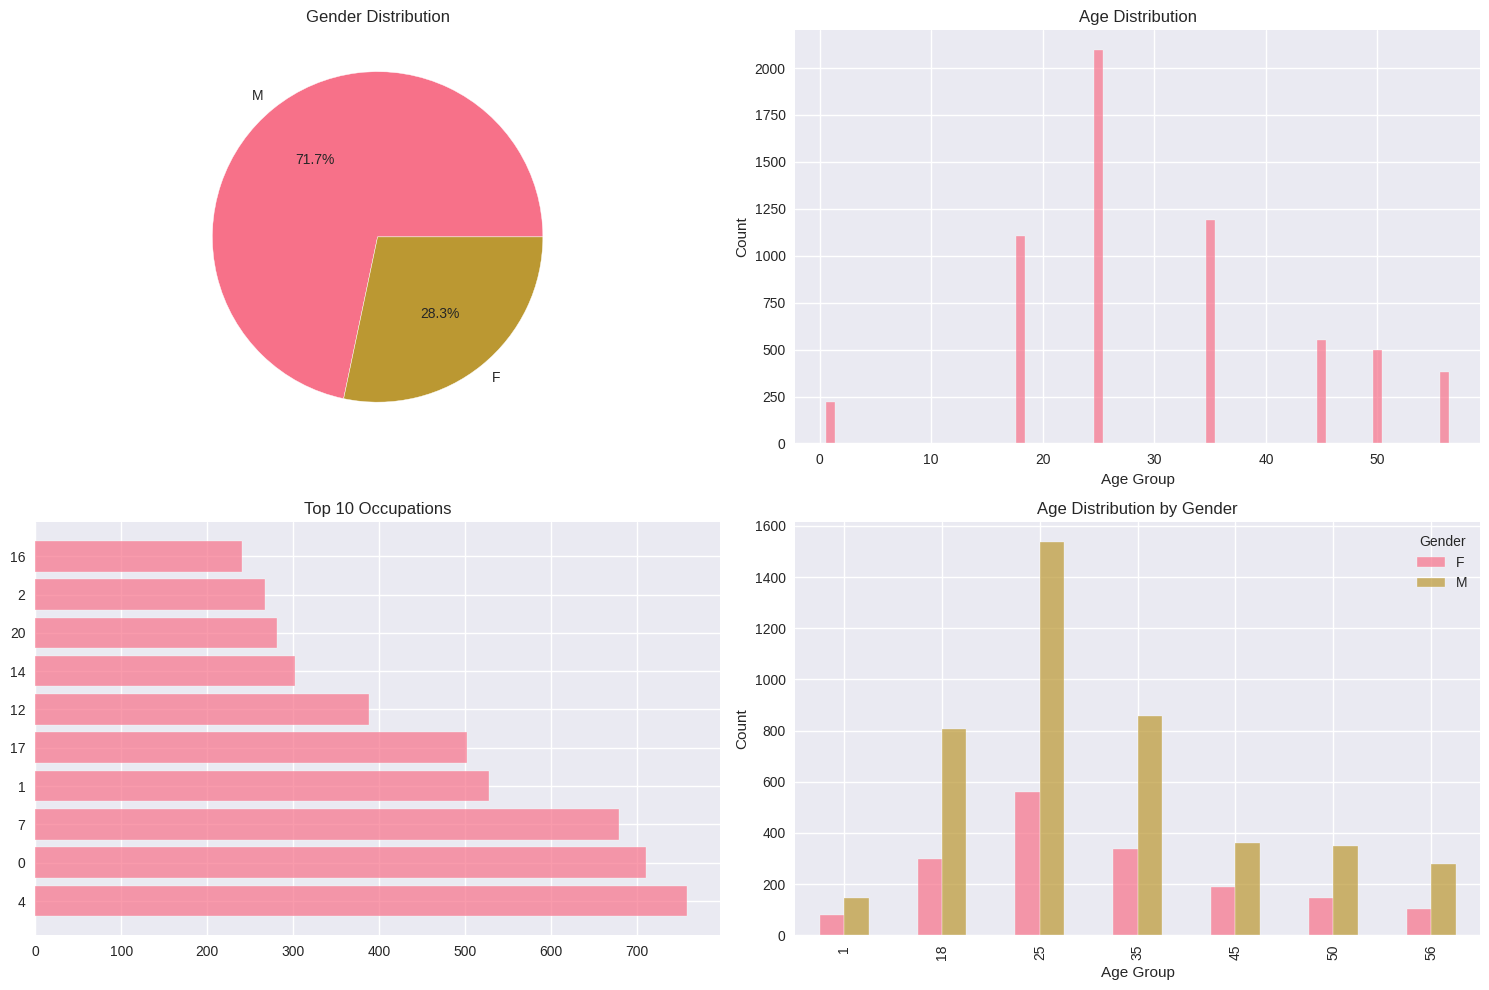

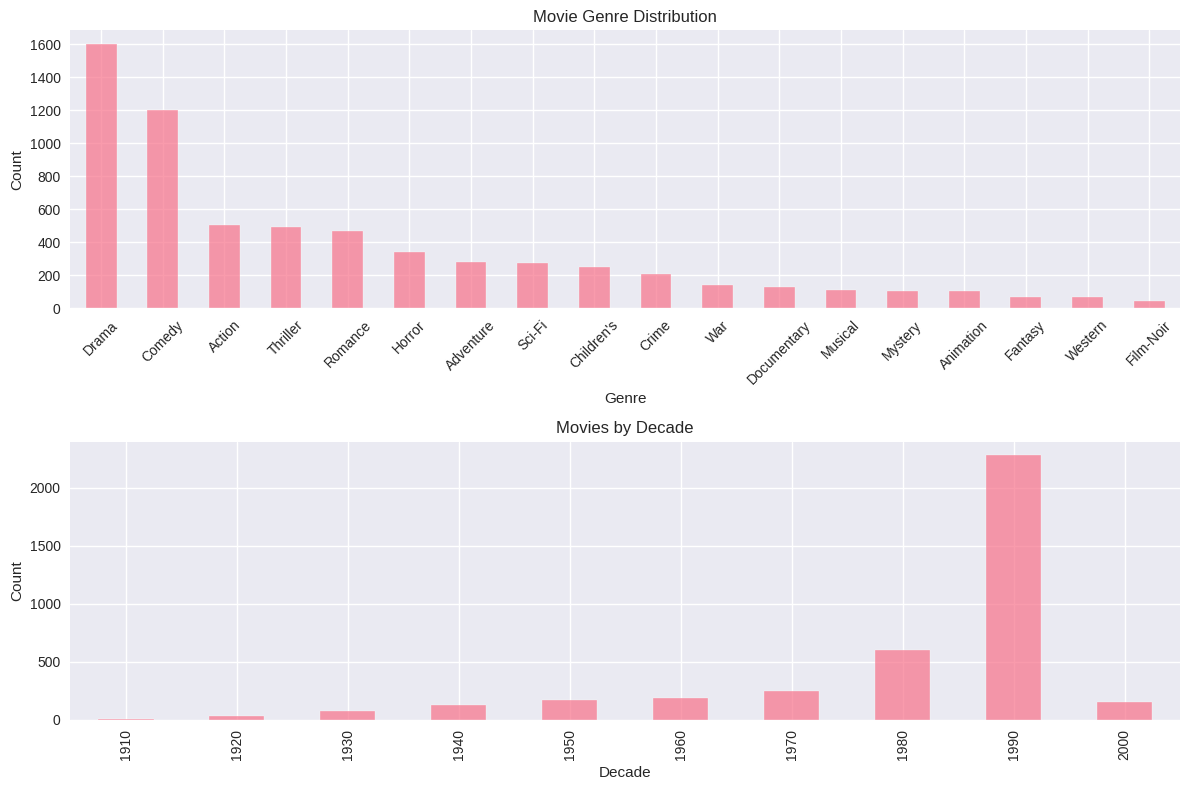

=== MOVIE STATISTICS ===
Total movies: 3883
Unique genres: 18
Most common genre: Drama (1603 movies)
Average genres per movie: 1.7

EDA Complete! Key insights:
1. Check sparsity level - affects model choice
2. Look at rating distribution - affects loss functions
3. Note user/movie activity patterns - affects train/test splits
4. Consider temporal patterns - might need time-based features


In [10]:
run_full_eda(ratings, movies, users)